In [1]:
!pip install -q datascience                                         
!pip install -q pandas-profiling  

In [2]:
!pip install -q --upgrade pandas-profiling

In [3]:
import pandas as pd                                                
from ydata_profiling import ProfileReport                          
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                 
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     
import seaborn as sns                                               
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp    

In [4]:
url="https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data"
df = pd.read_csv(url)
print(df.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Data Analysis


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
#to get duplicate value
df.duplicated().value_counts()

False    195
dtype: int64

In [8]:
#there is no duplicate data found, but below code can be used to drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
#to get nulls
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Handling missing data


In [10]:
df['MDVP:PPQ'].isna().value_counts(), df['MDVP:PPQ'].mode()[0]

(False    193
 True       2
 Name: MDVP:PPQ, dtype: int64,
 0.00332)

In [11]:
df['MDVP:PPQ'] = df['MDVP:PPQ'].fillna(df['MDVP:PPQ'].mode()[0])

In [12]:
df['MDVP:PPQ'].isna().value_counts(), df['MDVP:PPQ'].mode()[0]

(False    195
 Name: MDVP:PPQ, dtype: int64,
 0.00332)

In [13]:
df['Jitter:DDP'].isna().value_counts(), df['Jitter:DDP'].mode()[0]

(False    194
 True       1
 Name: Jitter:DDP, dtype: int64,
 0.00507)

In [14]:
df['Jitter:DDP'] = df['Jitter:DDP'].fillna(df['Jitter:DDP'].mode()[0])

In [15]:
df['Jitter:DDP'].isna().value_counts(), df['Jitter:DDP'].mode()[0]

(False    195
 Name: Jitter:DDP, dtype: int64,
 0.00507)

In [16]:
profile = ProfileReport(df, title="Epilepsy")

In [17]:
profile.to_file("Epilepsy.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization

In [22]:
def set_figsize(size=[20,7]):
    return plt.figure(figsize=size)

Text(0.5, 1.0, 'Healthy VS Non-Healthy ')

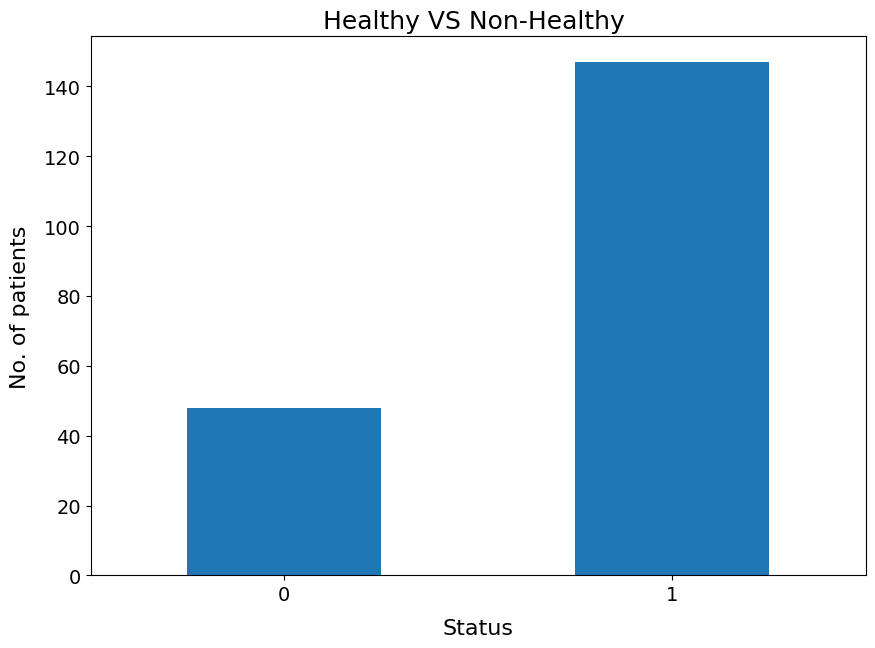

In [23]:
#differentiating healthy people from people having the disease
set_figsize([10,7])
df['status'].value_counts().sort_index().plot.bar()
plt.xlabel('Status', fontsize=16, labelpad=10)
plt.ylabel('No. of patients', fontsize=16, labelpad=10)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.title('Healthy VS Non-Healthy ', fontsize=18)

In [25]:
print(df.columns.tolist())

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [26]:
X = df[['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']]
y = df['status']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4) 

In [28]:
X_train

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
156,phon_R01_S37_4,122.336,142.369,94.794,0.00727,0.00006,0.00415,0.00339,0.01246,0.02293,...,0.01771,0.03615,0.03191,22.953,0.611679,0.623731,-5.435100,0.230532,2.699645,0.220546
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.06460,0.10546,0.07889,14.989,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
170,phon_R01_S42_6,244.990,272.210,239.170,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
180,phon_R01_S44_4,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,phon_R01_S37_3,117.870,127.349,95.654,0.00647,0.00005,0.00356,0.00300,0.01067,0.03087,...,0.02402,0.04977,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256
104,phon_R01_S25_2,154.003,160.267,128.621,0.00183,0.00001,0.00076,0.00100,0.00229,0.01030,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
114,phon_R01_S26_6,206.327,226.355,92.020,0.00495,0.00002,0.00302,0.00246,0.00905,0.02105,...,0.01604,0.03320,0.01048,21.864,0.331508,0.715121,-6.729713,0.181701,2.938114,0.115515
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [29]:
X_test

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
153,phon_R01_S37_1,121.345,139.644,98.250,0.00684,0.00006,0.00388,0.00332,0.01164,0.02534,...,0.02056,0.04019,0.04179,21.520,0.566867,0.670475,-4.865194,0.246404,2.013530,0.168581
71,phon_R01_S18_6,136.358,176.595,65.750,0.00971,0.00007,0.00534,0.00478,0.01601,0.04978,...,0.03736,0.08247,0.03361,18.570,0.543299,0.733232,-5.207985,0.224852,2.642276,0.242981
134,phon_R01_S33_1,106.516,112.777,93.105,0.00589,0.00006,0.00291,0.00319,0.00873,0.04932,...,0.03651,0.08050,0.03031,17.060,0.637814,0.744064,-5.301321,0.320385,2.375138,0.243080
116,phon_R01_S27_2,158.219,442.557,71.948,0.00476,0.00003,0.00214,0.00207,0.00642,0.01458,...,0.01312,0.01818,0.01554,26.356,0.450798,0.653823,-6.051233,0.273280,2.640798,0.170106
36,phon_R01_S08_1,177.876,192.921,168.013,0.00411,0.00002,0.00233,0.00241,0.00700,0.02126,...,0.01612,0.03463,0.00586,23.216,0.360148,0.778834,-6.149653,0.218037,2.477082,0.165827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,phon_R01_S18_5,142.729,162.408,65.476,0.00831,0.00006,0.00469,0.00419,0.01407,0.03485,...,0.02949,0.05605,0.02599,20.264,0.489345,0.730387,-5.720868,0.158830,2.277927,0.180828
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.00003,0.00166,0.00190,0.00499,0.01358,...,0.01140,0.01992,0.00435,26.436,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376
53,phon_R01_S13_6,129.336,139.867,118.604,0.00490,0.00004,0.00165,0.00183,0.00495,0.02498,...,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491
79,phon_R01_S20_2,100.770,115.697,85.545,0.01038,0.00010,0.00622,0.00576,0.01865,0.03121,...,0.02139,0.05320,0.02220,19.200,0.594387,0.790117,-4.913885,0.265699,2.398422,0.277948


In [30]:
y_train

156    1
149    1
170    0
8      1
180    1
      ..
155    1
104    1
114    1
9      1
117    1
Name: status, Length: 117, dtype: int64

In [31]:
y_test

153    1
71     1
134    1
116    1
36     1
      ..
70     1
171    0
53     0
79     1
6      1
Name: status, Length: 78, dtype: int64

In [32]:
# Split your data into independent and dependent variables
X = df.drop('status', axis=1)  # independent variables
y = df['status']  # dependent variable

# Print the shapes of X and y
print(f"Independent variable shape: {X.shape}")
print(f"Dependent variable shape: {y.shape}")

Independent variable shape: (195, 23)
Dependent variable shape: (195,)


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


X = df.drop(['name','status'], axis=1)  # independent variables

# Define the models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

# Evaluate each model using cross-validation
for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{type(model).__name__} score: {scores.mean()}")

# Select the best model
best_model = RandomForestRegressor()

# Train the best model on the full dataset
best_model.fit(X, y)


LinearRegression score: -0.304168564156714
DecisionTreeRegressor score: -0.3125324675324676
RandomForestRegressor score: -0.10327341847041857
KNeighborsRegressor score: -0.2960432900432902


RandomForestRegressor()

In [36]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df.drop(['name','status'], axis=1)  # independent variables
y = df['status']  # dependent variable

# Perform feature selection using Pearson correlation coefficient
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = df.columns[selector.get_support(indices=True)].tolist()

# Print the names of the selected features
print(f"Selected features: {selected_features}")

Selected features: ['name', 'MDVP:Fhi(Hz)', 'RPDE', 'DFA', 'spread2']
